In [10]:
# 상권 데이터 - 상가의 종류, 위치, 분류 코드 등의 데이터
# 유동인구 데이터 - 서울의 시간, 연령대 별 유동인구 수 데이터
# 데이터 분석의 4단계
# 데이터 불러오기 -> 살펴보기 -> 가공하기 -> 데이터 시각화

import pandas as pd
import matplotlib.pyplot as plt

commercial_data = pd.read_csv('./data/commercial.csv')
commercial_data.tail(5)
list(commercial_data),len(list(commercial_data))


(['상가업소번호',
  '상호명',
  '지점명',
  '상권업종대분류코드',
  '상권업종대분류명',
  '상권업종중분류코드',
  '상권업종중분류명',
  '상권업종소분류코드',
  '상권업종소분류명',
  '표준산업분류코드',
  '표준산업분류명',
  '시도코드',
  '시도명',
  '시군구코드',
  '시군구명',
  '행정동코드',
  '행정동명',
  '법정동코드',
  '법정동명',
  '지번코드',
  '대지구분코드',
  '대지구분명',
  '지번본번지',
  '지번부번지',
  '지번주소',
  '도로명코드',
  '도로명',
  '건물본번지',
  '건물부번지',
  '건물관리번호',
  '건물명',
  '도로명주소',
  '구우편번호',
  '신우편번호',
  '동정보',
  '층정보',
  '호정보',
  '경도',
  '위도'],
 39)

In [11]:
commercial_data.groupby('상가업소번호')['상권업종소분류명'].count().sort_values(ascending=False)

상가업소번호
2890524     1
24233199    1
24233093    1
24233106    1
24233112    1
           ..
16366025    1
16366017    1
16366013    1
16366003    1
28524865    1
Name: 상권업종소분류명, Length: 573680, dtype: int64

In [12]:
category_range = set(commercial_data['상권업종소분류명'])
category_range

# 내가 쓸 데이터는 상권업종소분류명 중 '후라이드/양념치킨'만 가져다 쓸것이다

{'LPG판매',
 '가구수리',
 '가구판매-돌침대',
 '가구판매-등가구',
 '가구판매-사무용가구',
 '가구판매-수입가구',
 '가구판매-응접세트',
 '가구판매-장농',
 '가구판매-침대전문',
 '가발판매',
 '가방/가죽제품소매',
 '가방구두수전',
 '가방대여',
 '가사도우미알선',
 '가스레인지판매',
 '가스설비',
 '가전제품수리',
 '가정용가구/기기임대',
 '가정용연료소매',
 '가죽/모피수선',
 '가죽/모피의류',
 '가죽모피세탁',
 '간판제작종합',
 '갈비/삼겹살',
 '갈치/생선구이',
 '개인/가정용품수리-종합',
 '건강/헬스용품',
 '건강보조기구판매',
 '건강식품판매',
 '건강원',
 '건과류판매',
 '건물분양-종합',
 '건어물상',
 '건축백화점',
 '검도도장',
 '게임룸',
 '게장전문',
 '결혼상담소',
 '경보기판매',
 '고객관리대행',
 '고기부페',
 '고등어전문',
 '고서적판매',
 '고속도로휴게소',
 '고시원',
 '곡물소매',
 '골동품수리',
 '골동품판매',
 '골프용품판매',
 '골프장',
 '골프회원권거래소',
 '곰장어전문',
 '곱창/양구이전문',
 '공연티켓예매',
 '공예품판매',
 '관광/민예품/선물용품소매',
 '관광/유흥주점',
 '광고대행-전화번호부',
 '광고물제작',
 '광고물제작-종합',
 '광촉매판매',
 '광택전문',
 '교복판매',
 '구내식당/자급식음식점',
 '구두제화/캐주얼화',
 '구판장/직판장',
 '국/찌개배달',
 '국수/만두/칼국수',
 '국제회의용역',
 '굴요리전문',
 '그릇판매',
 '그림/액자판매',
 '극장식유흥주점',
 '금고판매',
 '금연관련제품판매',
 '금은방',
 '기념패/휘장',
 '기능성신발판매',
 '기독교서적판매',
 '기사식당',
 '기원',
 '기타경기후원업/경기단체',
 '기타고기요리',
 '기타병원',
 '기타실내운동시설',
 '기타오락관련산업',
 '기타운영설비',
 '기타일반유흥주점',
 '기타전

In [13]:
commercial_data['도로명주소']

0           서울특별시 강남구 남부순환로 2933
1             서울특별시 강남구 선릉로93길 6
2             서울특별시 금천구 가산로 34-6
3               부산광역시 사상구 괘감로 37
4               서울특별시 송파구 가락로 71
                   ...          
573675       서울특별시 마포구 마포대로14길 4
573676       서울특별시 성동구 성수일로8길 37
573677        서울특별시 강남구 강남대로 492
573678       서울특별시 영등포구 국제금융로 10
573679    서울특별시 도봉구 도봉로114길 22-8
Name: 도로명주소, Length: 573680, dtype: object

In [14]:
#  상권 데이터 가공하기 (전처리) --> 데이터분석의 꽃!
#  str.split로 쪼개기, n = 2 : 3덩어리로 쪼갠다는 의미
#  덩어리(도로명)를 쪼갰으니, column을 확장 시켜야한다 expand!
commercial_data[['시', '구', '상세주소']] = commercial_data['도로명'].str.split(' ', n = 2, expand=True)
commercial_data

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도,시,구,상세주소
0,19905471,와라와라호프,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,135280,6280.0,NaN,1,NaN,127.061026,37.493922,서울특별시,강남구,남부순환로
1,19911397,커피빈코리아선릉로93길점,코리아선릉로93길점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,135080,6149.0,NaN,1,NaN,127.047883,37.505675,서울특별시,강남구,선릉로93길
2,19911801,프로포즈,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,153010,8545.0,NaN,1,NaN,126.899220,37.471711,서울특별시,금천구,가산로
3,19912201,싱싱커피&토스트,NaN,Q,음식,Q07,패스트푸드,Q07A10,토스트전문,I56192,...,617726,46977.0,NaN,1,26,128.980455,35.159774,부산광역시,사상구,괘감로
4,19932756,가락사우나내스낵,NaN,F,생활서비스,F09,대중목욕탕/휴게,F09A02,사우나/증기탕/온천,S96121,...,138846,5690.0,NaN,1,NaN,127.104071,37.500249,서울특별시,송파구,가락로
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573675,16394290,비파티세리공덕,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,121801,4211.0,NaN,NaN,NaN,126.955059,37.548618,서울특별시,마포구,마포대로14길
573676,16336474,앤탑PC방,NaN,N,관광/여가/오락,N01,PC/오락/당구/볼링등,N01A01,인터넷PC방,R91222,...,133834,4794.0,NaN,2,NaN,127.054615,37.545853,서울특별시,성동구,성수일로8길
573677,16336218,오즈아레나PC방,NaN,N,관광/여가/오락,N01,PC/오락/당구/볼링등,N01A01,인터넷PC방,R91222,...,135825,6119.0,NaN,2,NaN,127.024102,37.506202,서울특별시,강남구,강남대로
573678,16335152,파인트리네일,NaN,F,생활서비스,F01,이/미용/건강,F01A02,발/네일케어,S96119,...,150945,7326.0,NaN,1,NaN,126.924863,37.525172,서울특별시,영등포구,국제금융로


In [15]:
# 서울시 데이터만 남겨놓는다
seoul_data = commercial_data[commercial_data['시'] == '서울특별시']
seoul_data

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도,시,구,상세주소
0,19905471,와라와라호프,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,135280,6280.0,NaN,1,NaN,127.061026,37.493922,서울특별시,강남구,남부순환로
1,19911397,커피빈코리아선릉로93길점,코리아선릉로93길점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,135080,6149.0,NaN,1,NaN,127.047883,37.505675,서울특별시,강남구,선릉로93길
2,19911801,프로포즈,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,153010,8545.0,NaN,1,NaN,126.899220,37.471711,서울특별시,금천구,가산로
4,19932756,가락사우나내스낵,NaN,F,생활서비스,F09,대중목욕탕/휴게,F09A02,사우나/증기탕/온천,S96121,...,138846,5690.0,NaN,1,NaN,127.104071,37.500249,서울특별시,송파구,가락로
5,19983535,초밥왕,NaN,Q,음식,Q03,일식/수산물,Q03A03,음식점-초밥전문,I56113,...,138735,5510.0,NaN,1,NaN,127.102490,37.515149,서울특별시,송파구,올림픽로
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573675,16394290,비파티세리공덕,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,121801,4211.0,NaN,NaN,NaN,126.955059,37.548618,서울특별시,마포구,마포대로14길
573676,16336474,앤탑PC방,NaN,N,관광/여가/오락,N01,PC/오락/당구/볼링등,N01A01,인터넷PC방,R91222,...,133834,4794.0,NaN,2,NaN,127.054615,37.545853,서울특별시,성동구,성수일로8길
573677,16336218,오즈아레나PC방,NaN,N,관광/여가/오락,N01,PC/오락/당구/볼링등,N01A01,인터넷PC방,R91222,...,135825,6119.0,NaN,2,NaN,127.024102,37.506202,서울특별시,강남구,강남대로
573678,16335152,파인트리네일,NaN,F,생활서비스,F01,이/미용/건강,F01A02,발/네일케어,S96119,...,150945,7326.0,NaN,1,NaN,126.924863,37.525172,서울특별시,영등포구,국제금융로


In [16]:
# set으로 감싸서 '시'에 무엇이 남았는지 확인
set(seoul_data['시'])

{'서울특별시'}

In [17]:
# 이제 치킨집만 남길 것이다
seoul_chicken_data = seoul_data[seoul_data['상권업종소분류명'] == '후라이드/양념치킨']
seoul_chicken_data

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도,시,구,상세주소
970,25489266,랄라참숯바베큐,NaN,Q,음식,Q05,닭/오리요리,Q05A08,후라이드/양념치킨,I56193,...,157200,7527.0,NaN,1,NaN,126.851447,37.563829,서울특별시,강서구,양천로57길
1068,25494874,아이러브훌랄라,NaN,Q,음식,Q05,닭/오리요리,Q05A08,후라이드/양념치킨,I56193,...,152050,8314.0,NaN,1,NaN,126.889599,37.488552,서울특별시,구로구,도림로
1086,19972219,시네마치킨,NaN,Q,음식,Q05,닭/오리요리,Q05A08,후라이드/양념치킨,I56193,...,120827,3696.0,NaN,1,NaN,126.931346,37.576644,서울특별시,서대문구,홍연8길
1461,22519746,호식이두마리치킨성내점,성내점,Q,음식,Q05,닭/오리요리,Q05A08,후라이드/양념치킨,I56193,...,134030,5403.0,NaN,1,NaN,127.130918,37.527751,서울특별시,강동구,성안로
1815,19978953,은혜닭집,NaN,Q,음식,Q05,닭/오리요리,Q05A08,후라이드/양념치킨,I56193,...,157220,7617.0,NaN,1,NaN,126.815252,37.564291,서울특별시,강서구,초원로16길
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571924,16364416,치탑7,수락산점,Q,음식,Q05,닭/오리요리,Q05A08,후라이드/양념치킨,I56193,...,139837,1625.0,NaN,1,NaN,127.055990,37.677137,서울특별시,노원구,동일로242가길
572573,16388503,호식이두마리치킨,종암점,Q,음식,Q05,닭/오리요리,Q05A08,후라이드/양념치킨,I56193,...,136863,2803.0,NaN,NaN,NaN,127.031308,37.602304,서울특별시,성북구,종암로21길
572895,16364098,휘경통닭,NaN,Q,음식,Q05,닭/오리요리,Q05A08,후라이드/양념치킨,I56193,...,130835,2514.0,NaN,1,NaN,127.071071,37.581233,서울특별시,동대문구,사가정로25가길
573118,16360129,고집쎈강정,NaN,Q,음식,Q05,닭/오리요리,Q05A08,후라이드/양념치킨,I56193,...,130865,2571.0,NaN,3,70109,127.039127,37.579031,서울특별시,동대문구,고산자로36길


In [18]:
set(seoul_chicken_data['상권업종소분류명'])

{'후라이드/양념치킨'}

In [19]:
# 서울 치킨 데이터를 구 별로 묶을 것이다.
group_data = seoul_chicken_data.groupby('구')
group_by_category = group_data['상권업종소분류명']
chicken_count_place = group_by_category.count()
sorted_chicken_place = chicken_count_place.sort_values(ascending=False)
sorted_chicken_place

구
강남구     386
광진구     326
은평구     274
노원구     268
관악구     244
강서구     239
서초구     237
송파구     232
성북구     224
구로구     222
강동구     219
동대문구    213
마포구     197
영등포구    189
도봉구     184
중랑구     183
서대문구    181
양천구     154
동작구     149
강북구     149
종로구     146
중구      143
성동구     137
금천구     123
용산구      98
Name: 상권업종소분류명, dtype: int64

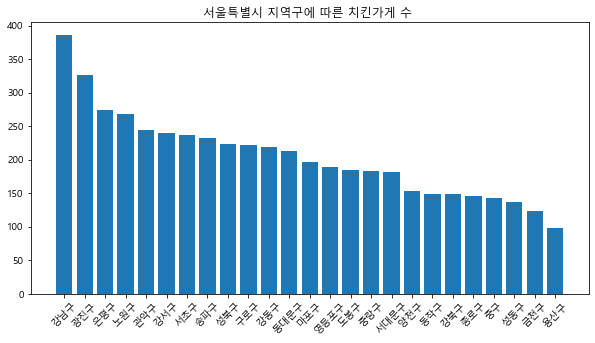

In [20]:
# 바그래프, 지도로 표현
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=(10,5))
plt.bar(sorted_chicken_place.index, sorted_chicken_place)
plt.title('서울특별시 지역구에 따른 치킨가게 수 ')
plt.xticks(rotation = 45)
plt.show()

In [21]:
conda install -c conda-forge folium

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [22]:
import folium
import json

seoul_state_geo = './data/seoul_geo.json'
geo_data = json.load(open(seoul_state_geo, encoding='utf-8'))
geo_data

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {'code': '11250',
    'name': '강동구',
    'name_eng': 'Gangdong-gu',
    'base_year': '2013'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[127.11519584981606, 37.557533180704915],
      [127.11879551821994, 37.557222485451305],
      [127.12146867175024, 37.55986003393365],
      [127.12435254630417, 37.56144246249796],
      [127.13593925898998, 37.56564793048277],
      [127.14930548011061, 37.56892250303897],
      [127.15511020940411, 37.57093642128295],
      [127.16683184366129, 37.57672487388627],
      [127.17038810813094, 37.576465605301046],
      [127.17607118428914, 37.57678573961056],
      [127.17905504160184, 37.57791388161732],
      [127.17747787800164, 37.57448983055031],
      [127.1781775408844, 37.571481967974336],
      [127.17995281860672, 37.569309661290504],
      [127.18122821955262, 37.56636089217979],
      [127.18169407550688, 37.56286338914073],
      [127.18408792

In [23]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11)
map

In [24]:
# folium을 이용해서 지도에 데이터를 뿌려볼 것이다.
folium.Choropleth(geo_data=geo_data,
                 data=chicken_count_place,
                 columns=[chicken_count_place.index],
                 fill_color='PuRd',
                 key_on='properties.name').add_to(map)
map

In [25]:
# -------------------------------------------------
# 유동인구 데이터 불러오기
import pandas as pd
import matplotlib.pyplot as plt
import folium
import json

population = pd.read_csv('./data/population07.csv')
population

,일자,시간(1시간단위),연령대(10세단위),성별,시,군구,유동인구수
0,20200701,0,40,남성,서울,강동구,35460
1,20200701,0,40,남성,서울,구로구,37440
2,20200701,0,40,남성,서울,도봉구,25830
3,20200701,1,60,여성,서울,구로구,25460
4,20200701,2,20,여성,서울,강동구,29260
...,...,...,...,...,...,...,...
223195,20200731,22,20,여성,서울,구로구,29360
223196,20200731,22,20,여성,서울,성북구,32900
223197,20200731,22,30,남성,서울,강동구,34010
223198,20200731,23,30,여성,서울,서대문구,21960


In [26]:
list(population), len(list(population))

(['일자', '시간(1시간단위)', '연령대(10세단위)', '성별', '시', '군구', '유동인구수'], 7)

In [27]:
set(population['연령대(10세단위)']), len(set(population['연령대(10세단위)']))

({20, 30, 40, 50, 60, 70}, 6)

In [28]:
set(population['군구']), len(set(population['군구']))

({'강남구',
  '강동구',
  '강북구',
  '강서구',
  '관악구',
  '광진구',
  '구로구',
  '금천구',
  '노원구',
  '도봉구',
  '동대문구',
  '동작구',
  '마포구',
  '서대문구',
  '서초구',
  '성동구',
  '성북구',
  '송파구',
  '양천구',
  '영등포구',
  '용산구',
  '은평구',
  '종로구',
  '중구',
  '중랑구'},
 25)

In [29]:
set(population['시'])

{'서울'}

In [30]:
# chaining 
population_of_seoul_in_july = population.groupby('군구')['유동인구수'].sum()
population_of_seoul_in_july

군구
강남구     453357240
강동구     242930680
강북구     173997750
강서구     325595830
관악구     287636390
광진구     209156700
구로구     261236520
금천구     169245980
노원구     288804820
도봉구     175983790
동대문구    212387560
동작구     229112910
마포구     255460990
서대문구    184607650
서초구     310087200
성동구     189574430
성북구     245474150
송파구     383413900
양천구     239145440
영등포구    295398340
용산구     158183260
은평구     245698760
종로구     166734020
중구      169567740
중랑구     214829950
Name: 유동인구수, dtype: int64

In [31]:
plt.rcParams['font.family'] = 'Malgun Gothic'

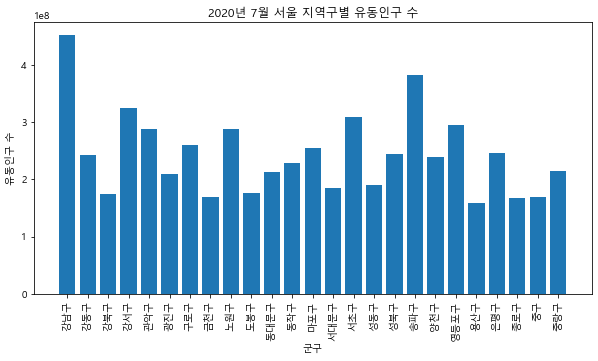

In [32]:
plt.figure(figsize=(10,5))
plt.bar(population_of_seoul_in_july.index, population_of_seoul_in_july)
plt.title('2020년 7월 서울 지역구별 유동인구 수')
plt.xlabel('군구')
plt.ylabel('유동인구 수')
plt.xticks(rotation = 90)
plt.show()

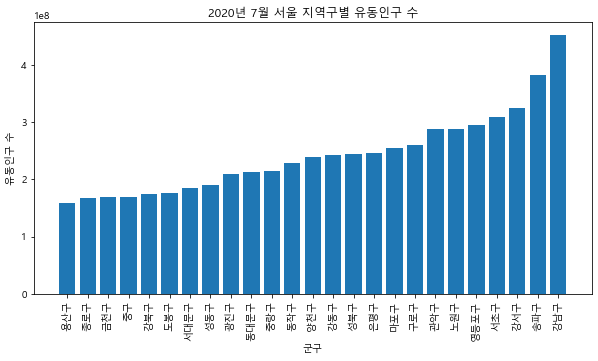

In [33]:
sorted_population_of_seoul_in_july = population_of_seoul_in_july.sort_values(ascending=True)
plt.figure(figsize=(10,5))
plt.bar(sorted_population_of_seoul_in_july.index, sorted_population_of_seoul_in_july)
plt.title('2020년 7월 서울 지역구별 유동인구 수')
plt.xlabel('군구')
plt.ylabel('유동인구 수')
plt.xticks(rotation = 90)
plt.show()

In [34]:
# 강남구의 7월 일별 그래프
population_kangnam = population[population['군구'] == '강남구']
population_kangnam

,일자,시간(1시간단위),연령대(10세단위),성별,시,군구,유동인구수
20,20200701,6,50,남성,서울,강남구,48340
40,20200701,15,60,남성,서울,강남구,34600
48,20200701,19,20,남성,서울,강남구,60810
58,20200701,22,40,남성,서울,강남구,59150
61,20200701,23,30,남성,서울,강남구,54910
...,...,...,...,...,...,...,...
223064,20200729,22,60,남성,서울,강남구,25360
223087,20200730,7,20,여성,서울,강남구,51060
223114,20200730,14,60,여성,서울,강남구,38240
223144,20200731,4,40,여성,서울,강남구,51650


In [35]:
population_kangnam_daily = population_kangnam.groupby('일자')['유동인구수'].sum()
population_kangnam_daily

일자
20200701    15655820
20200702    15689100
20200703    15554150
20200704    12533180
20200705    11426880
20200706    15487350
20200707    15672780
20200708    15679740
20200709    15749340
20200710    15616600
20200711    12635000
20200712    11451890
20200713    15408640
20200714    15665970
20200715    15686100
20200716    15647080
20200717    15471660
20200718    12421330
20200719    11396840
20200720    15377850
20200721    15707680
20200722    15604020
20200723    15605720
20200724    15519960
20200725    12437400
20200726    11288760
20200727    15241240
20200728    15484510
20200729    15406410
20200730    15454500
20200731    15379740
Name: 유동인구수, dtype: int64

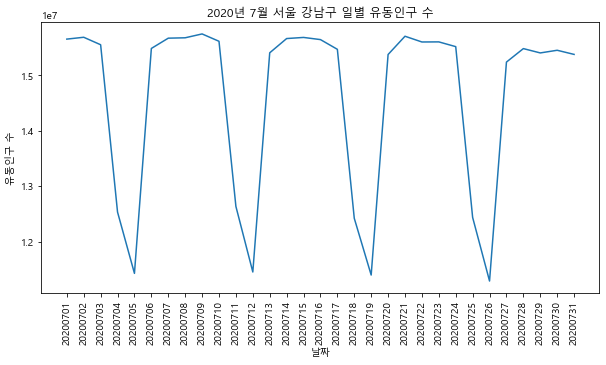

In [36]:
plt.figure(figsize=(10,5))

date = []
for day in population_kangnam_daily.index:
    date.append(str(day))
    
plt.plot(date, population_kangnam_daily)
plt.title('2020년 7월 서울 강남구 일별 유동인구 수')
plt.xlabel('날짜')
plt.ylabel('유동인구 수')
plt.xticks(rotation=90)
plt.show()

In [37]:
# 필요없는 정보는 tiles에서 속성을 바꾼다
seoul_state_geo = './data/seoul_geo.json'
geo_data = json.load(open(seoul_state_geo,encoding='utf-8'))

map = folium.Map(location=[37.5502, 126.982], zoom_start=11)

folium.Choropleth(geo_data=geo_data,
                 data=population_kangnam_daily,
                 columns=[population_kangnam_daily.index],
                 fill_color='PuRd',
                 key_on='properties.name').add_to(map)

map

In [38]:
# 상권과 유동인구 같이 분석
new_sorted_chicken_place = pd.DataFrame(sorted_chicken_place).reset_index()
new_sorted_chicken_place

,구,상권업종소분류명
0,강남구,386
1,광진구,326
2,은평구,274
3,노원구,268
4,관악구,244
5,강서구,239
6,서초구,237
7,송파구,232
8,성북구,224
9,구로구,222


In [39]:
new_sorted_population = pd.DataFrame(sorted_population_of_seoul_in_july).reset_index()
new_sorted_population

,군구,유동인구수
0,용산구,158183260
1,종로구,166734020
2,금천구,169245980
3,중구,169567740
4,강북구,173997750
5,도봉구,175983790
6,서대문구,184607650
7,성동구,189574430
8,광진구,209156700
9,동대문구,212387560


In [40]:
# 위에서 새로운 데이터 프레임을 만들어서 합치려고 한다.
gu_chicken = new_sorted_chicken_place.join(new_sorted_population.set_index('군구'), on='구')
gu_chicken

,구,상권업종소분류명,유동인구수
0,강남구,386,453357240
1,광진구,326,209156700
2,은평구,274,245698760
3,노원구,268,288804820
4,관악구,244,287636390
5,강서구,239,325595830
6,서초구,237,310087200
7,송파구,232,383413900
8,성북구,224,245474150
9,구로구,222,261236520


In [42]:
gu_chicken['유동인구수/치킨집수'] = gu_chicken['유동인구수'] / gu_chicken['상권업종소분류명']
gu_chicken

,구,상권업종소분류명,유동인구수,유동인구수/치킨집수
0,강남구,386,453357240,1.174501e+06
1,광진구,326,209156700,6.415850e+05
2,은평구,274,245698760,8.967108e+05
3,노원구,268,288804820,1.077630e+06
4,관악구,244,287636390,1.178838e+06
5,강서구,239,325595830,1.362326e+06
6,서초구,237,310087200,1.308385e+06
7,송파구,232,383413900,1.652646e+06
8,성북구,224,245474150,1.095867e+06
9,구로구,222,261236520,1.176741e+06


In [44]:
# 데이터 정렬
gu_chicken = gu_chicken.sort_values(by='유동인구수/치킨집수')
gu_chicken

,구,상권업종소분류명,유동인구수,유동인구수/치킨집수
1,광진구,326,209156700,6.415850e+05
2,은평구,274,245698760,8.967108e+05
14,도봉구,184,175983790,9.564336e+05
11,동대문구,213,212387560,9.971247e+05
16,서대문구,181,184607650,1.019932e+06
3,노원구,268,288804820,1.077630e+06
8,성북구,224,245474150,1.095867e+06
10,강동구,219,242930680,1.109273e+06
20,종로구,146,166734020,1.142014e+06
19,강북구,149,173997750,1.167770e+06


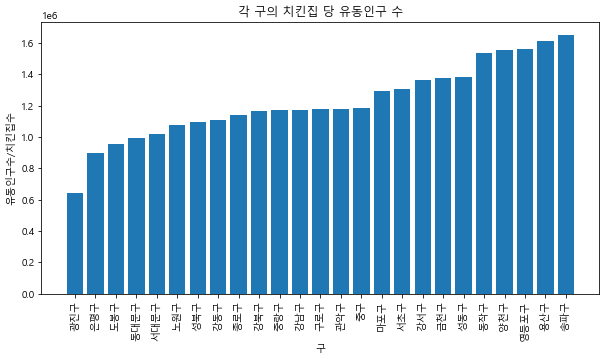

In [46]:
plt.figure(figsize=(10,5))
plt.bar(gu_chicken['구'],gu_chicken['유동인구수/치킨집수'])
plt.title('각 구의 치킨집 당 유동인구 수')
plt.xlabel('구')
plt.ylabel('유동인구수/치킨집수')
plt.xticks(rotation=90)
plt.show()

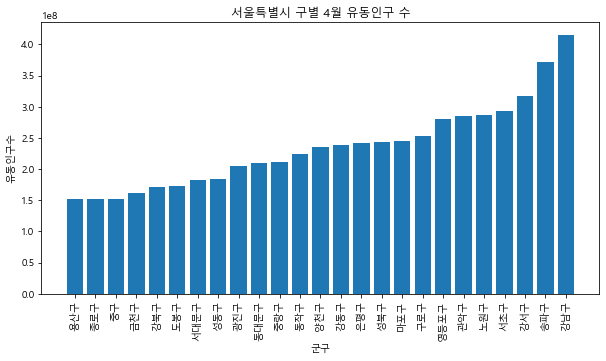

4월의 유동인구가 가장 많은 구 : 강남구


In [91]:
# 2주차 과제
# 4월 강남구의 유동인구를 분석해봅시다.
# Q1. 4월의 유동인구가 가장 많은 구는 어디일까요? (bar)

import pandas as pd
import matplotlib.pyplot as plt

population_of_April = pd.read_csv('./data/population04.csv')
population_of_July = pd.read_csv('./data/population07.csv')

population_by_gu_of_April = population_of_April.groupby('군구')['유동인구수'].sum()
sorted_population_by_gu_of_April = population_by_gu_of_April.sort_values(ascending=True)

plt.figure(figsize=(10,5))
plt.bar(sorted_population_by_gu_of_April.index,sorted_population_by_gu_of_April)
plt.title('서울특별시 구별 4월 유동인구 수')
plt.xlabel('군구')
plt.ylabel('유동인구수')
plt.xticks(rotation = 90)
plt.show()

print('4월의 유동인구가 가장 많은 구 : 강남구')

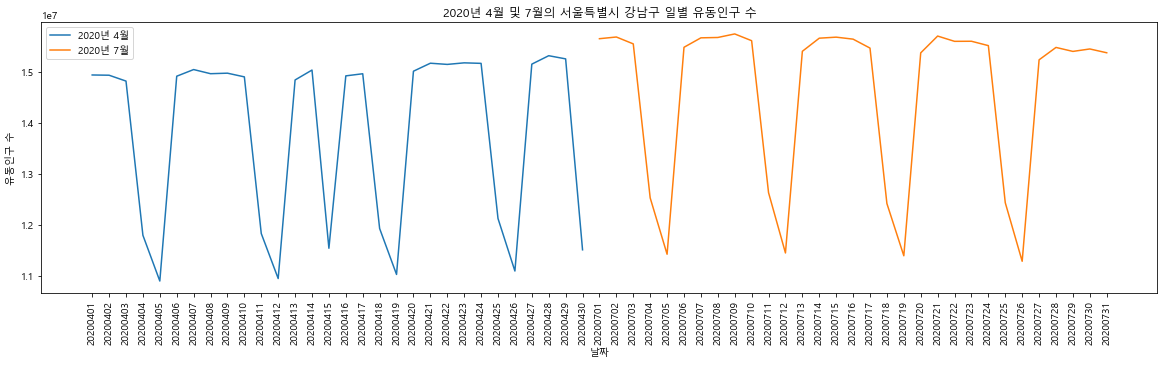

In [92]:
# Q2. 4월과 7월의 강남구의 일별 유동인구는 어떤가요? (line)
population_kangnam_of_April = population_of_April[population_of_April['군구'] == '강남구']
population_kangnam_of_April = population_kangnam_of_April.groupby('일자')['유동인구수'].sum()

population_kangnam_of_July = population_of_July[population_of_July['군구'] == '강남구']
population_kangnam_of_July = population_kangnam_of_July.groupby('일자')['유동인구수'].sum()

date_of_April = []
date_of_July = []
for day in population_kangnam_of_April.index:
    date_of_April.append(str(day))
    
for day in population_kangnam_of_July.index:
    date_of_July.append(str(day))

plt.figure(figsize=(20,5))    
plt.plot(date_of_April, population_kangnam_of_April, label = '2020년 4월')
plt.plot(date_of_July, population_kangnam_of_July, label = '2020년 7월')

plt.title('2020년 4월 및 7월의 서울특별시 강남구 일별 유동인구 수')
plt.xlabel('날짜')
plt.ylabel('유동인구 수')
plt.xticks(rotation = 90)
plt.legend()
plt.show()

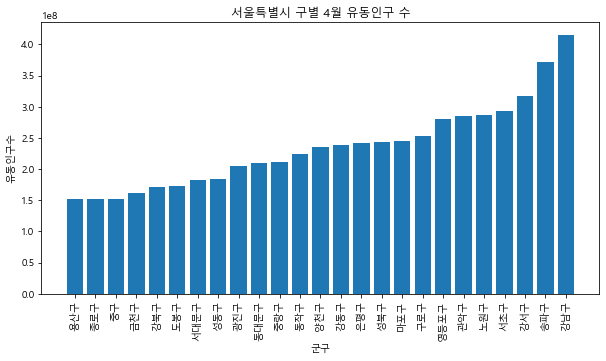

4월의 유동인구가 가장 많은 구 : 강남구


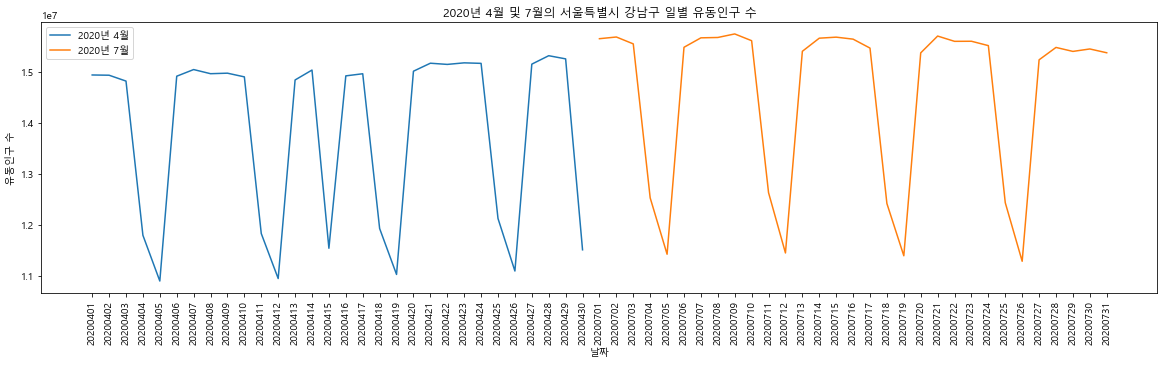

In [93]:
# 2주차 과제
# 4월 강남구의 유동인구를 분석해봅시다.
# Q1. 4월의 유동인구가 가장 많은 구는 어디일까요? (bar)

import pandas as pd
import matplotlib.pyplot as plt

population_of_April = pd.read_csv('./data/population04.csv')
population_of_July = pd.read_csv('./data/population07.csv')

population_by_gu_of_April = population_of_April.groupby('군구')['유동인구수'].sum()
sorted_population_by_gu_of_April = population_by_gu_of_April.sort_values(ascending=True)

plt.figure(figsize=(10,5))
plt.bar(sorted_population_by_gu_of_April.index,sorted_population_by_gu_of_April)
plt.title('서울특별시 구별 4월 유동인구 수')
plt.xlabel('군구')
plt.ylabel('유동인구수')
plt.xticks(rotation = 90)
plt.show()

print('4월의 유동인구가 가장 많은 구 : 강남구')

# Q2. 4월과 7월의 강남구의 일별 유동인구는 어떤가요? (line)
population_kangnam_of_April = population_of_April[population_of_April['군구'] == '강남구']
population_kangnam_of_April = population_kangnam_of_April.groupby('일자')['유동인구수'].sum()

population_kangnam_of_July = population_of_July[population_of_July['군구'] == '강남구']
population_kangnam_of_July = population_kangnam_of_July.groupby('일자')['유동인구수'].sum()

date_of_April = []
date_of_July = []
for day in population_kangnam_of_April.index:
    date_of_April.append(str(day))
    
for day in population_kangnam_of_July.index:
    date_of_July.append(str(day))

plt.figure(figsize=(20,5))    
plt.plot(date_of_April, population_kangnam_of_April, label = '2020년 4월')
plt.plot(date_of_July, population_kangnam_of_July, label = '2020년 7월')

plt.title('2020년 4월 및 7월의 서울특별시 강남구 일별 유동인구 수')
plt.xlabel('날짜')
plt.ylabel('유동인구 수')
plt.xticks(rotation = 90)
plt.legend()
plt.show()